<a href="https://colab.research.google.com/github/jwjung3030/StaticAssetAllocation/blob/main/rebalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#참고사이트
#https://github.com/HongJunhyoung/Snowball
#https://github.com/FinanceData/FinanceDataReader

#실행방법
getBackTest({'SPY':0.5, '153130':0.5})

종목코드와 비율을 입력하면 동작합니다. (비율의 합은 1이 되어야 합니다.)

In [1]:
pip -q install finance-datareader

In [2]:
pip -q install snowball

     |████████████████████████████████| 23.9 MB 14 kB/s 


In [5]:
# KODEX 미국S&P500선물(H) : 219480.KS 2015년 05월 29일
# TIGER 미국S&P500선물(H) : 143850.KS 2011년 07월 18일
# KOSEF 미국달러선물 : 138230.KS 2011년 02월 24일
# KOSEF 국고채10년레버리지: 167860.KS 2011년 2012년 10월 30일
# KODEX 골드선물(H) : 132030.KS 2010년 10월 01일
# KINDEX 골드선물 레버리지(합성 H)225130.KS 2015년 07월 28일
# ARIRANG 신흥국MSCI(합성 H): 195980.KS 2014년 05월 13일
# KODEX MSCI EM선물(H) : 291890.KS 2018년 03월 23일
# ARIRANG 글로벌MSCI(합성 H): 189400.KS 2013년 12월 10일
# TIGER 미국나스닥100: 133690.KS 2010년 10월 18일
# KODEX 미국나스닥100선물(H): 304940.KS 2018년 08월 30일
# KINDEX 미국S&P500: 360200.KS 2020년 08월 07일
# KODEX 단기채권: 153130.KS 2012년 02월 22일

              SPY  153130
Date                     
1993-02-01  44.25     NaN
1993-02-02  44.34     NaN
1993-02-03  44.81     NaN
1993-02-04  45.00     NaN
1993-02-05  44.97     NaN
-- DROP none data --
               SPY   153130
Date                       
2012-02-22  136.03  87277.0
2012-02-23  136.63  87299.0
2012-02-24  136.93  87303.0
2012-02-27  137.16  87308.0
2012-02-28  137.56  87320.0
               SPY    153130
Date                        
2021-09-10  445.44  102895.0
2021-09-13  446.58  102900.0
2021-09-14  444.17  102890.0
2021-09-15  447.88  102895.0
2021-09-16  447.17  102920.0


  0%            (DATE) 0/2288 |                     Elapsed 00:00 | Remaining ? | ?s/it

__[ Backtest Log ]__

No,Event,Date,Message
1,Rebalancing,2012-02-29,2 trades
2,,2012-03-30,2 trades
···,,·····,·····
114,,2021-07-30,2 trades
115,,2021-08-31,2 trades


__[ Porfolio Performance ]__

- _2012-02-29 ~ 2021-09-16 ( 9 years 7 months )_

,MTD,YTD,1Y,5Y,10Y,CAGR,Volatility,Sharpe,MDD
Portfolio,-0.46%,+9.90%,+15.20%,+51.58%,N/A,+7.99%,+8.23%,0.97,-17.85%


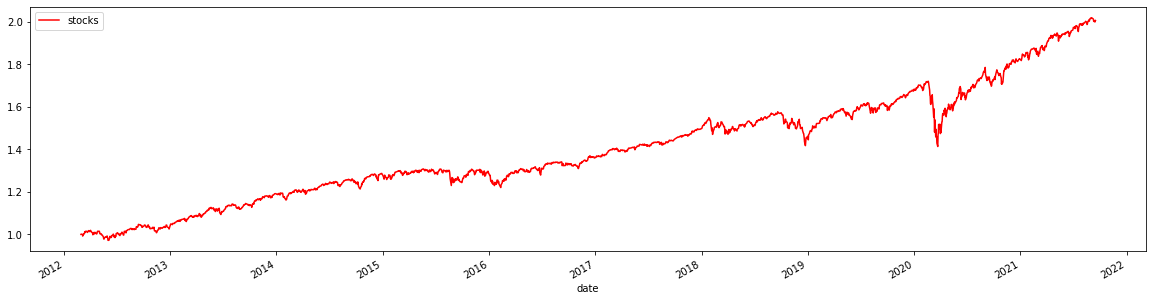

In [6]:
import FinanceDataReader as fdr
import pandas as pd
import snowball as sb

def getStockData(stcklist = ['360200', '304940']):
  stocks = stcklist

  data = pd.DataFrame()
  for stock in stocks:

    if data.empty:
      df1 = pd.DataFrame(fdr.DataReader(stock)['Close'])
      df1 = df1.reset_index()
      df1.set_index('Date', inplace=True)
      df1.columns = [stock]
      data = df1

    else:
      df2 = pd.DataFrame(fdr.DataReader(stock)['Close'])
      df2 = df2.reset_index()
      df2.set_index('Date', inplace=True)
      df2.columns = [stock]
      data = data.join(df2, on='Date', how='left')

  df_dop_row = data.dropna(axis=0)
  print(data.head())
  print('-- DROP none data --')
  print(df_dop_row.head())
  print(df_dop_row.tail())
  data = df_dop_row

  return data

def drawGraph(df):
  import itertools
  import numpy as np

  df['addone'] = df['return']+1
  monthly_income = df['addone'].to_list()
  result = np.cumprod(monthly_income)
  df['stocks'] = result
  df.head().to_csv('head.csv')
  df.tail().to_csv('tail.csv')

  import matplotlib.pyplot as plt
  df.plot(kind='line', y='stocks', color='red', figsize=(20, 5))
  plt.show()

def showInfo(bal64):
  df_stats = pd.DataFrame.from_dict(bal64.stats, orient='index', columns=['Portfolio'])
  df_stats_transposed = df_stats.T
  df_stats_transposed

def getBackTest(stock_weight={'360200':0.5, '304940':0.5}, pstart = None):

  stocklist = list(stock_weight)
  data = getStockData(stocklist) 

  bal64 = sb.backtest(prices=data, 
                      schedule='EOM', 
                      weight=stock_weight,
                      start = pstart)
                        
  bal64.report()

  drawGraph(bal64.returns)

# getBackTest({'360200':0.5, '304940':0.5})
# getBackTest({'219480':0.5, '133690':0.5}, pstart = "2020-08-31")
# getBackTest({'219480':0, '133690':1}, pstart = "2020-08-31")
# getBackTest({'360200':0, '304940':1}, pstart = "2020-08-31")
getBackTest({'SPY':0.5, '153130':0.5})